# Ensemble

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab_Notebooks/다변량분석

/content/drive/MyDrive/Colab_Notebooks/다변량분석


## Package Install, Import, Data Load, Random seed

In [ ]:
pip install adjustText

In [5]:
import torch  # PyTorch를 사용하기 위한 라이브러리
import torch.nn as nn  # 신경망 모델을 정의하기 위한 라이브러리
import torch.optim as optim  # 옵티마이저를 사용하기 위한 라이브러리
from torch.utils.data import DataLoader, TensorDataset, random_split, Subset  # 데이터셋 및 데이터로더를 관리하기 위한 라이브러리
import numpy as np  # 배열 및 행렬 연산을 위한 라이브러리
import os  # 운영 체제 관련 기능을 사용하기 위한 라이브러리
import pandas as pd  # 데이터프레임을 다루기 위한 라이브러리
import seaborn as sns  # 시각화를 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from tqdm.notebook import tqdm  # 진행 상황을 시각화하여 보여주기 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터를 훈련 및 테스트 세트로 분할하기 위한 라이브러리
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score, roc_auc_score  # 성능 지표 계산을 위한 라이브러리
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델을 사용하기 위한 라이브러리
from sklearn.tree import DecisionTreeClassifier  # 의사 결정 트리 모델을 사용하기 위한 라이브러리
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier  # 앙상블 모델을 사용하기 위한 라이브러리
from sklearn.neural_network import MLPClassifier  # 다층 퍼셉트론(MLP)을 사용하기 위한 라이브러리
from sklearn.model_selection import GridSearchCV  # 그리드 서치를 사용하기 위한 라이브러리
from sklearn.preprocessing import MinMaxScaler, RobustScaler  # 데이터 스케일링을 위한 라이브러리
from sklearn.metrics import accuracy_score, balanced_accuracy_score  # 성능 지표 계산을 위한 라이브러리

from imblearn.under_sampling import NearMiss, RandomUnderSampler  # 소수 클래스 샘플 언더 샘플링을 위한 라이브러리
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE  # 다수 클래스 샘플 오버 샘플링을 위한 라이브러리
from imblearn.combine import SMOTEENN  # 다수 클래스 샘플 오버 샘플링 및 소수 클래스 샘플 언더 샘플링을 위한 라이브러리
from imblearn.ensemble import BalancedBaggingClassifier  # 균형 잡힌 배깅 앙상블을 위한 라이브러리

from adjustText import adjust_text  # 텍스트 라벨 조정을 위한 라이브러리

In [6]:
def set_seed(seed):
    # Python의 랜덤 시드 고정
    random.seed(seed)

    # NumPy의 랜덤 시드 고정
    np.random.seed(seed)

    # PyTorch의 랜덤 시드 고정
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # 모든 GPU에 대해 시드 고정

    # CuDNN의 비결정적 동작 방지
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # 환경 변수 설정
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

## Data load and simple EDA

In [76]:
data = pd.read_csv('Earthquake_Damage.csv')
#일련번호인 building_id는 예측에 유용한 정보를 주지 않는 변수이므로 제외
data = data.drop(columns='building_id', axis=1)
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


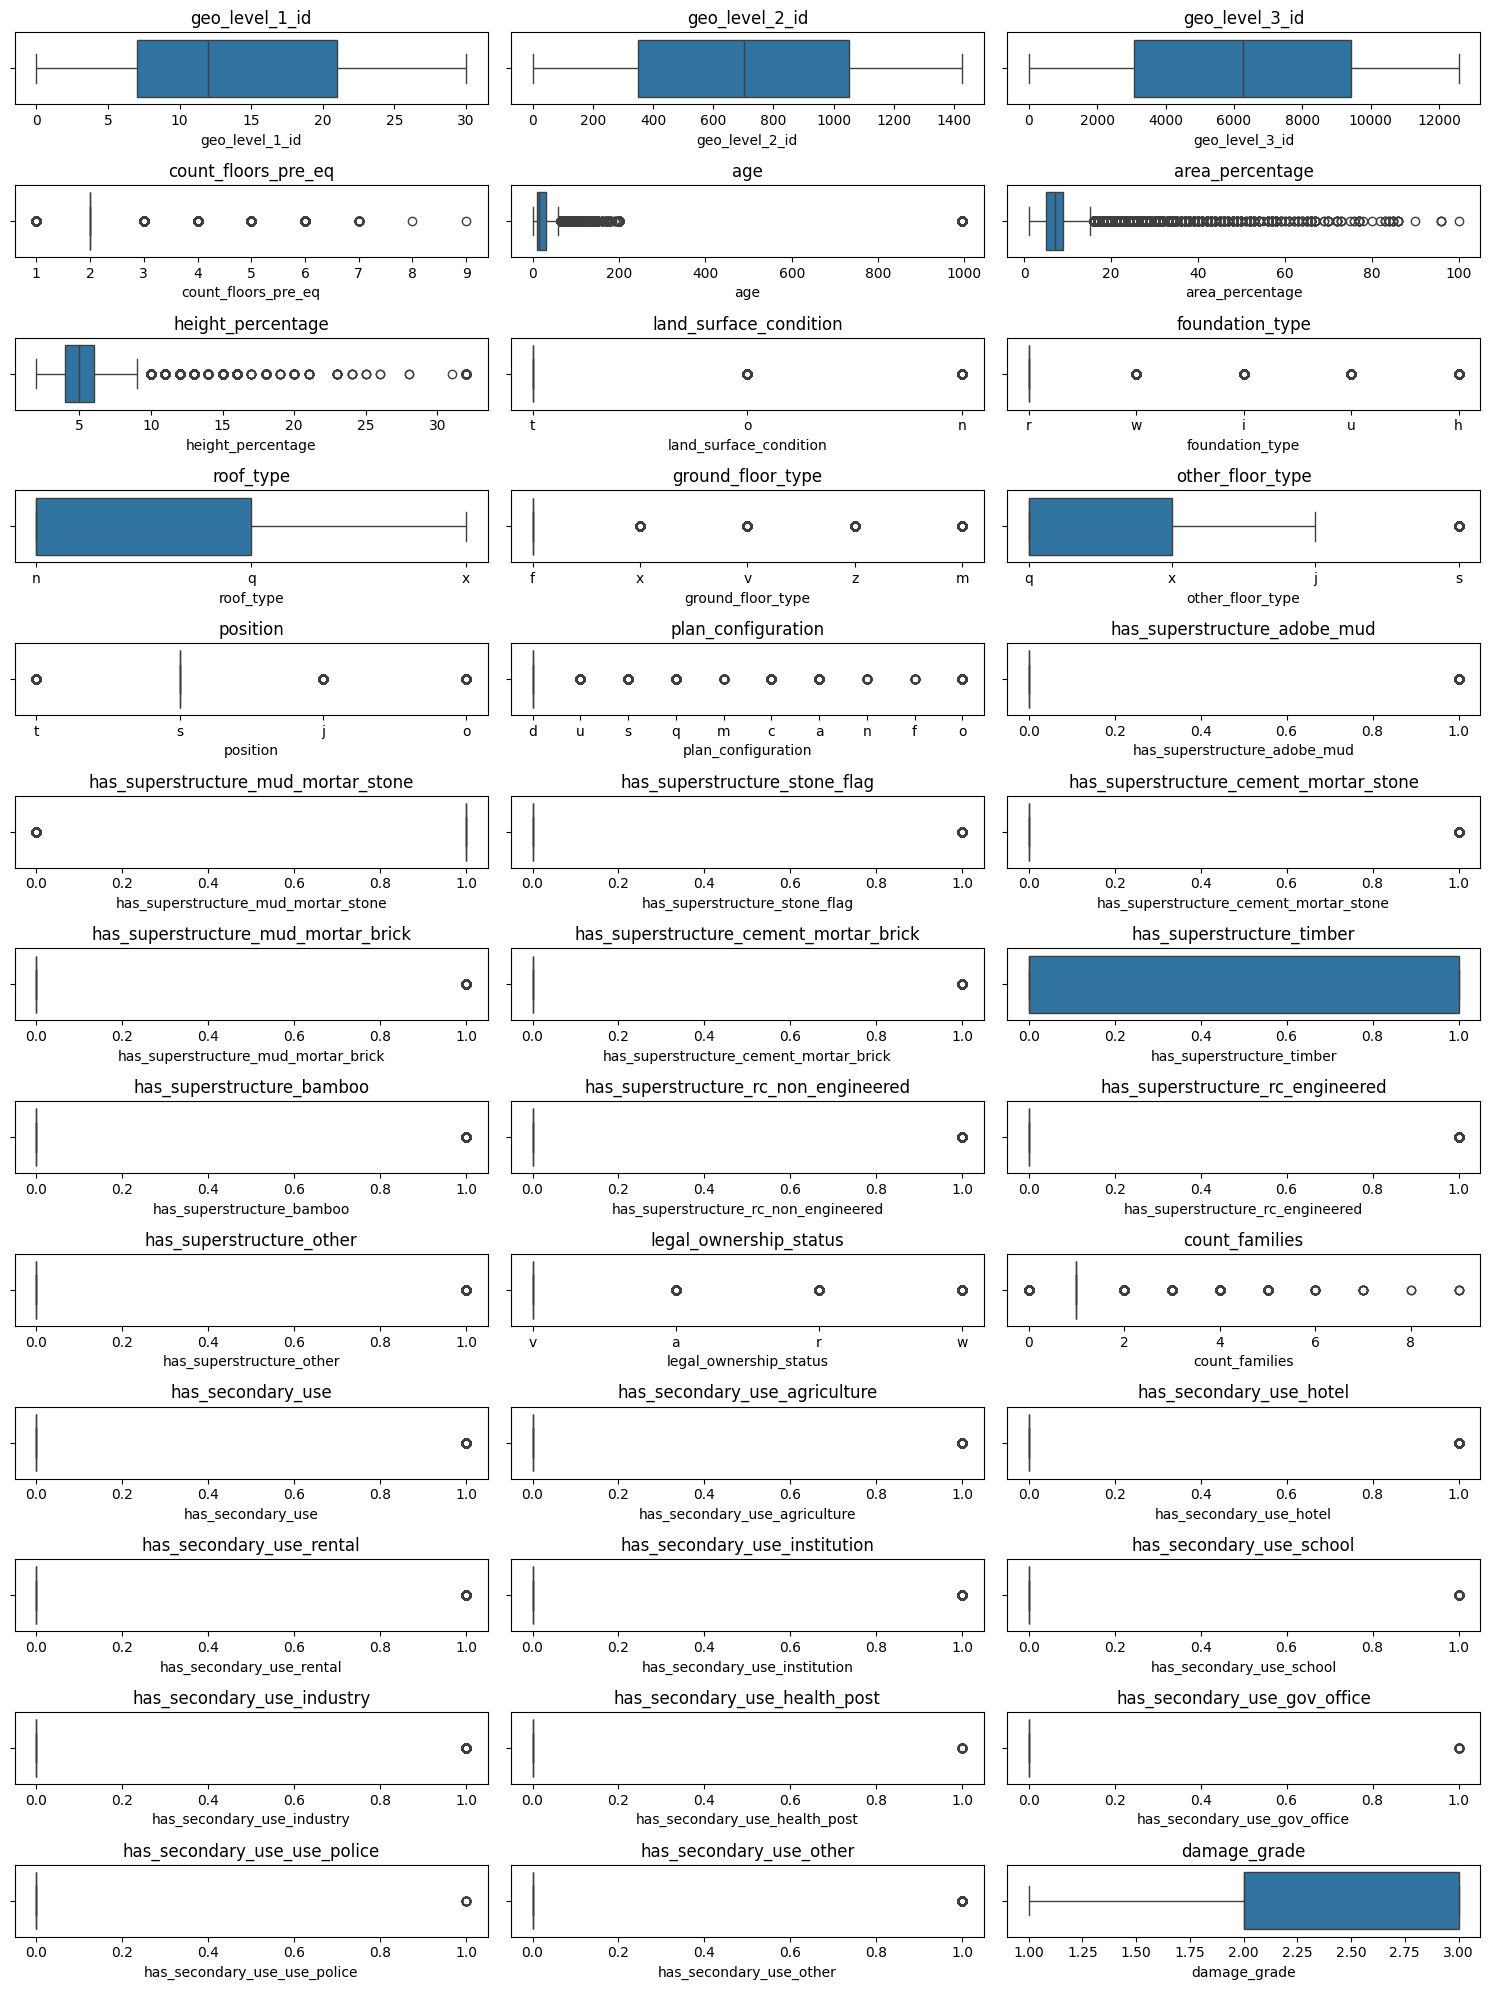

In [80]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(data.columns)/3)), ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(data.columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [9]:
data.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


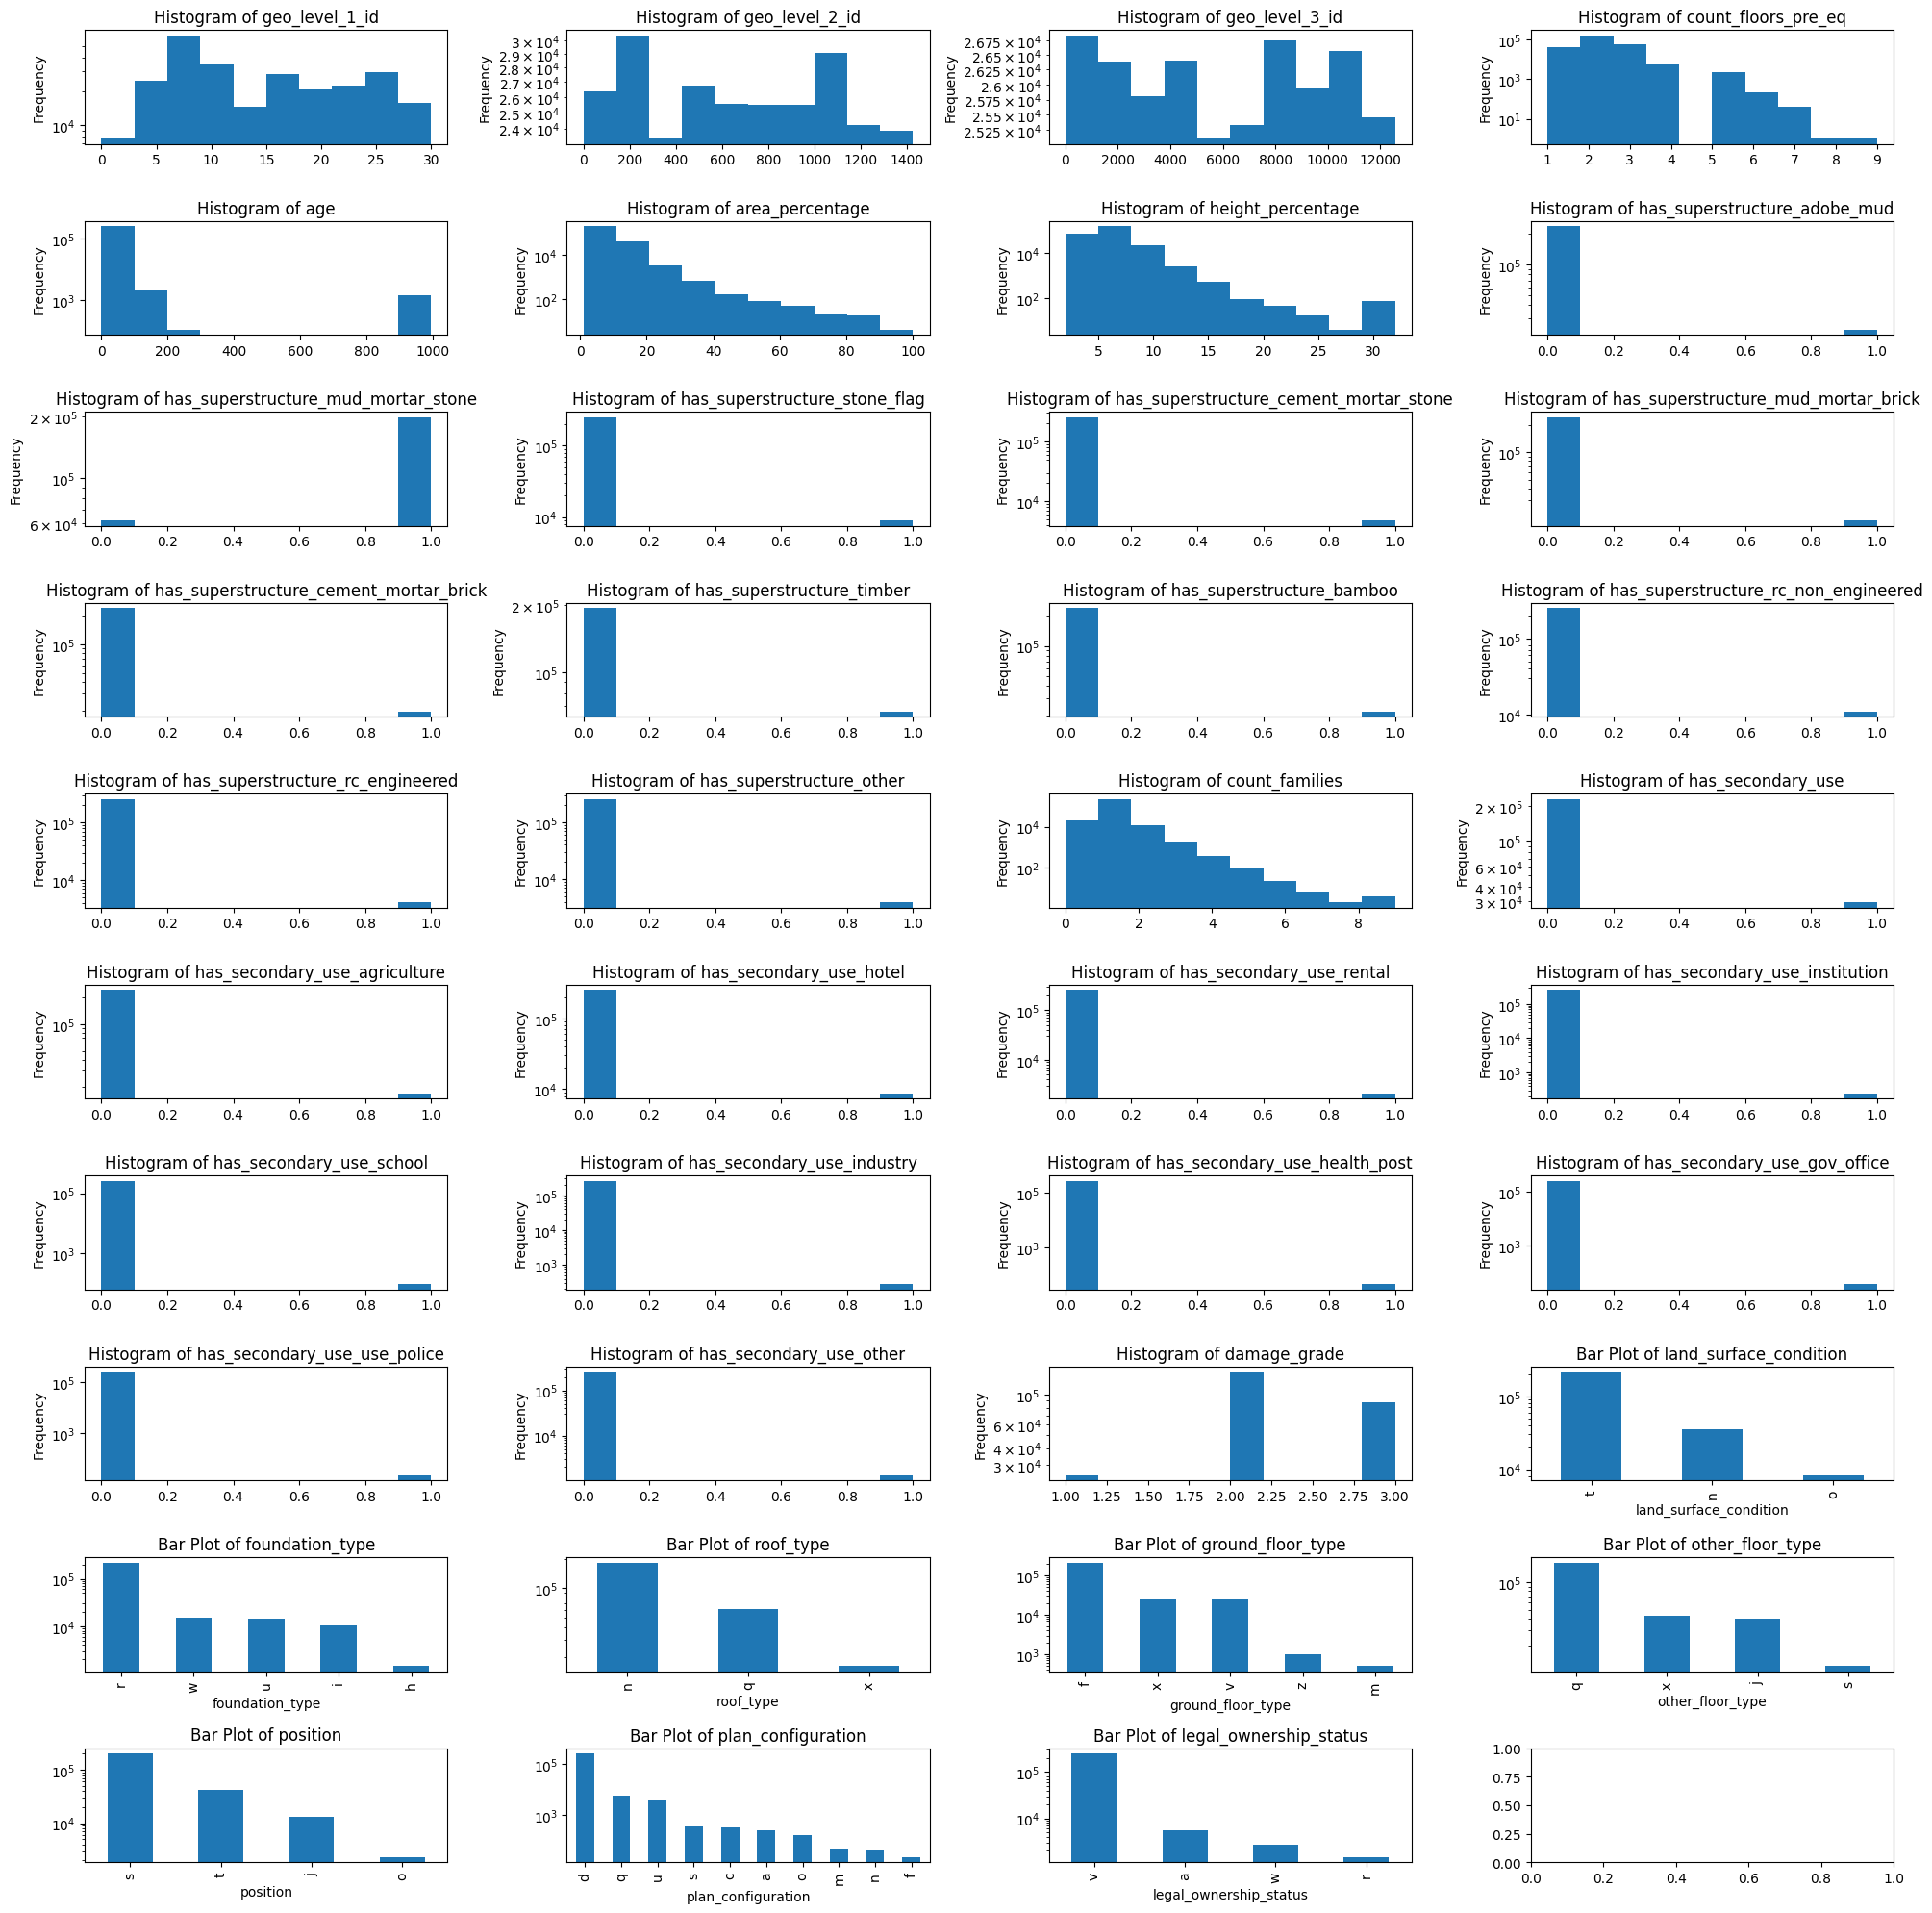

In [10]:
def plot_columns(df):
    num_columns = df.select_dtypes(include=['number']).columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns

    num_plots = len(num_columns)
    cat_plots = len(cat_columns)
    total_plots = num_plots + cat_plots

    fig, axes = plt.subplots(int(np.ceil(total_plots/4)), 4, figsize=(20,20))

    axes = axes.flatten()

    plot_index = 0

    for col in num_columns:
        df[col].plot(kind='hist', ax=axes[plot_index], title=f'Histogram of {col}')
        axes[plot_index].set_yscale('log')
        plot_index += 1

    for col in cat_columns:
        df[col].value_counts().plot(kind='bar', ax=axes[plot_index], title=f'Bar Plot of {col}')
        axes[plot_index].set_yscale('log')
        plot_index += 1

    plt.tight_layout()
    plt.show()
    return cat_columns

# 함수 실행
cat_cols = plot_columns(data)

In [11]:
#명목형 변수에 대한 one-hot-encoding 처리
pro_data = pd.get_dummies(data=data,columns=cat_cols,drop_first=True)
pro_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,False,False,False,False,False,False,False,False,True,False
1,8,900,2812,2,10,8,7,0,1,0,...,False,False,False,False,False,False,False,False,True,False
2,21,363,8973,2,10,5,5,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,22,418,10694,2,10,6,5,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,11,131,1488,3,30,8,9,1,0,0,...,False,False,False,False,False,False,False,False,True,False


In [12]:
pro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 61 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   count_floors_pre_eq                     260601 non-null  int64
 4   age                                     260601 non-null  int64
 5   area_percentage                         260601 non-null  int64
 6   height_percentage                       260601 non-null  int64
 7   has_superstructure_adobe_mud            260601 non-null  int64
 8   has_superstructure_mud_mortar_stone     260601 non-null  int64
 9   has_superstructure_stone_flag           260601 non-null  int64
 10  has_superstructure_cement_mortar_stone  260601 non-null  int64
 11  

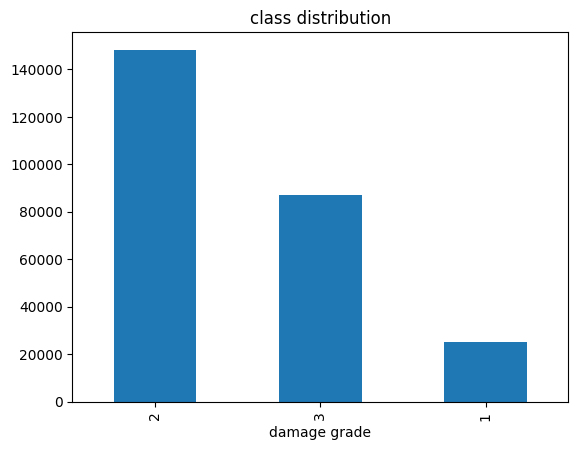

In [13]:
#class distribution
pro_data['damage_grade'].value_counts().plot(kind='bar',title='class distribution', xlabel='damage grade')
plt.show()

In [14]:
X = pro_data
pre_pro_data, _ = train_test_split(X, train_size=10000, random_state=42, stratify=X['damage_grade'])
pre_pro_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
91016,22,19,11315,2,15,5,5,0,1,0,...,False,False,False,False,False,False,False,False,True,False
184131,21,123,1614,3,35,12,8,0,1,0,...,False,False,False,False,False,False,False,False,True,False
211722,27,1155,5535,3,25,11,8,0,1,0,...,False,False,False,False,False,False,False,False,True,False
124195,2,1213,8714,2,25,15,6,0,1,0,...,False,False,False,False,False,False,False,False,True,False
41979,4,1218,2175,2,20,7,4,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [15]:
pre_pro_data

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
91016,22,19,11315,2,15,5,5,0,1,0,...,False,False,False,False,False,False,False,False,True,False
184131,21,123,1614,3,35,12,8,0,1,0,...,False,False,False,False,False,False,False,False,True,False
211722,27,1155,5535,3,25,11,8,0,1,0,...,False,False,False,False,False,False,False,False,True,False
124195,2,1213,8714,2,25,15,6,0,1,0,...,False,False,False,False,False,False,False,False,True,False
41979,4,1218,2175,2,20,7,4,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144062,10,1382,11682,2,35,3,5,0,1,0,...,False,False,False,False,False,False,False,False,True,False
199494,17,1381,1231,2,60,8,7,0,1,0,...,False,False,False,False,False,False,False,False,True,False
242222,17,446,3737,1,0,6,2,0,1,0,...,False,False,False,False,False,False,False,False,True,False
117433,17,618,9657,2,10,5,5,0,1,0,...,False,False,False,False,False,False,False,False,True,False


### [Q1] 다음과 같이 세 가지 단일 모형에 대하여 분류 모델을 구축하고 Accuracy와 BCR 관점에서 분류 정확도를 비교해보시오. CART와 ANN의 경우 hyperparameter 후보 값들을 명시하고 Validation dataset을 통해서 최적의 값을 찾아서 Test에 사용하시오.

- Multinomial logistic regression
- Classification and Regression Tree (CART)
- Artificial Neural Network (ANN)

아래 질문들에 대해서는 Base Learner가 CART와 ANN인 경우 [Q1]에서 선택된 hyperparameter를 사용하여 실행하고 그 결과를 이용하여 답하시오.

In [16]:
#사전 작업 사항에 따라 6:2:2의 split 비율을 사용했다.
X = pre_pro_data.drop('damage_grade', axis=1).values
y = pd.get_dummies(pre_pro_data['damage_grade']).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# RobustScaler를 사용하여 스케일링
scaler = MinMaxScaler()

# 훈련 데이터에 대해 fit하고 transform
X_train = scaler.fit_transform(X_train)

# 검증 및 테스트 데이터에 대해 transform만 수행
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

y_train_int = np.argmax(y_train, axis=1)
y_val_int = np.argmax(y_val, axis=1)
y_test_int = np.argmax(y_test, axis=1)

In [17]:
y_train

array([[False,  True, False],
       [False,  True, False],
       [ True, False, False],
       ...,
       [False,  True, False],
       [False, False,  True],
       [False,  True, False]])

In [18]:
y_train_int

array([1, 1, 0, ..., 1, 2, 1])

In [19]:
# Create and train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_int)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test_int, y_pred_log_reg)
bcr_log_reg = balanced_accuracy_score(y_test_int, y_pred_log_reg)

print(f'Logistic Regression - Accuracy: {accuracy_log_reg:.4f}, BCR: {bcr_log_reg:.4f}')

Logistic Regression - Accuracy: 0.5950, BCR: 0.4729


In [20]:
# Define the hyperparameters grid
param_grid_cart = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Convert the dictionary to a list of hyperparameter combinations
param_combinations = list(ParameterGrid(param_grid_cart))

best_score = -float('inf')
best_params_cart = None

# Iterate over each hyperparameter combination
for params in param_combinations:
    # Create and train the model with the current parameters
    cart = DecisionTreeClassifier(**params, random_state=42)
    cart.fit(X_train, y_train_int)

    # Predict on the validation set
    y_val_pred = cart.predict(X_val)

    # Evaluate the model
    bcr_val = balanced_accuracy_score(y_val_int, y_val_pred)

    # Update the best parameters if the current model is better
    if bcr_val > best_score:
        best_score = bcr_val
        best_params_cart = params

# Train the model with the best parameters
cart = DecisionTreeClassifier(**best_params_cart, random_state=42)
cart.fit(X_train, y_train_int)

# Predict on the test set
y_pred_cart = cart.predict(X_test)

# Evaluate the model
accuracy_cart = accuracy_score(y_test_int, y_pred_cart)
bcr_cart = balanced_accuracy_score(y_test_int, y_pred_cart)

print(f'Best Parameters: {best_params_cart}')
print(f'CART - Accuracy: {accuracy_cart:.4f}, BCR: {bcr_cart:.4f}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
CART - Accuracy: 0.6520, BCR: 0.5832


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_int, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_int, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_int, dtype=torch.long)

# DataLoader 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False,)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,)

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, layer_num, activation_func):
        super(NeuralNet, self).__init__()
        layers = [nn.Linear(input_size, hidden_size)]

        # 활성화 함수 선택
        if activation_func == 'ReLU':
            activation = nn.ReLU()
        elif activation_func == 'Sigmoid':
            activation = nn.Sigmoid()
        elif activation_func == 'Tanh':
            activation = nn.Tanh()
        elif activation_func == 'LeakyReLU':
            activation = nn.LeakyReLU()
        elif activation_func == 'ELU':
            activation = nn.ELU()
        else:
            raise ValueError("지원되지 않는 활성화 함수입니다.")

        for _ in range(layer_num - 2):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation)

        layers.append(nn.Linear(hidden_size, output_size))
        layers.append(nn.Softmax(dim=1))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

In [24]:
def train_NN_model(input_size, train_loader, val_loader, hidden_size, layer_num, activation_func, lr=0.005, patience=3, plotting=False):
    model = NeuralNet(input_size=input_size, hidden_size=hidden_size, output_size=3, layer_num=layer_num, activation_func=activation_func)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    best_accuracy = 0
    best_bcr = 0
    patience_counter = 0
    best_model = None

    epoch_loss = []
    epoch_val_loss = []
    epoch_accuracy = []  # Accuracy 값을 저장할 리스트
    epoch_bcr = []  # BCR 값을 저장할 리스트

    for epoch in range(100):
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        epoch_loss.append(avg_loss)

        model.eval()
        total_val_loss = 0
        total_accuracy = 0
        total_bcr = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs = inputs.to(device)
                targets = targets.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)

                val_loss = criterion(outputs, targets)
                total_val_loss += val_loss.item()

                # 정확도 계산
                total_accuracy += accuracy_score(targets.cpu(), predicted.cpu())
                # BCR 계산: 각 클래스에 대한 재현율(recall)의 평균
                total_bcr += np.mean(recall_score(targets.cpu(), predicted.cpu(), average=None))

        avg_val_loss = total_val_loss / len(val_loader)
        epoch_val_loss.append(avg_val_loss)
        avg_accuracy = total_accuracy / len(val_loader)
        epoch_accuracy.append(avg_accuracy)  # 평균 정확도 저장
        avg_bcr = total_bcr / len(val_loader)
        epoch_bcr.append(avg_bcr)  # 평균 BCR 저장

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model
            best_accuracy = avg_accuracy
            best_bcr = avg_bcr
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Loss, 정확도, BCR 그래프 표시
    if plotting:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 3, 1)
        plt.plot(epoch_loss, label='Training Loss')
        plt.plot(epoch_val_loss, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(epoch_accuracy, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(epoch_bcr, label='Validation BCR')
        plt.xlabel('Epochs')
        plt.ylabel('BCR')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return best_model, best_accuracy, best_bcr

In [25]:
# Define the parameter grid
param_grid_ann = {
    'hidden_size': [32, 64, 128, 256],
    'layer_num': [3, 5, 7],
    'activation_func': ['ELU', 'ReLU', 'Tanh', 'Sigmoid'],
    'learning_rate' : [0.0001, 0.001, 0.005, 0.01]
}

# Adapt the grid search
best_bcr = 0
best_accuracy = 0
best_params_ann = None

i = 0
for params in tqdm(ParameterGrid(param_grid_ann)):
    model, accuracy, bcr = train_NN_model(
        input_size=X_train.shape[1],
        train_loader=train_loader,
        val_loader=val_loader,
        hidden_size=params['hidden_size'],
        layer_num=params['layer_num'],
        activation_func=params['activation_func'],
        lr=params['learning_rate']
    )

    if bcr > best_bcr :
        best_bcr = bcr
        best_accuracy = accuracy
        best_params_ann = params

    if (i+1) % 5 == 0:
            print(f"Case {i+1}/{len(ParameterGrid(param_grid_ann))}, BCR: {best_bcr:.4f}, Accuracy: {best_accuracy:.4f}")
    i += 1

  1%|▏         | 2/144 [00:18<18:51,  7.97s/it]

Early stopping triggered


  2%|▏         | 3/144 [00:20<11:35,  4.93s/it]

Early stopping triggered


  3%|▎         | 4/144 [00:29<15:38,  6.70s/it]

Early stopping triggered


  3%|▎         | 5/144 [00:31<11:36,  5.01s/it]

Early stopping triggered
Case 5/144, BCR: 0.4061, Accuracy: 0.5698


  4%|▍         | 6/144 [00:32<08:07,  3.53s/it]

Early stopping triggered


  5%|▍         | 7/144 [00:40<11:38,  5.10s/it]

Early stopping triggered


  6%|▌         | 8/144 [00:42<09:23,  4.14s/it]

Early stopping triggered


  6%|▋         | 9/144 [00:43<06:54,  3.07s/it]

Early stopping triggered


  7%|▋         | 10/144 [00:58<14:55,  6.68s/it]

Case 10/144, BCR: 0.4207, Accuracy: 0.5698


  8%|▊         | 11/144 [01:00<11:41,  5.28s/it]

Early stopping triggered


  8%|▊         | 12/144 [01:01<08:41,  3.95s/it]

Early stopping triggered


  9%|▉         | 13/144 [01:07<10:01,  4.59s/it]

Early stopping triggered


 10%|▉         | 14/144 [01:09<08:16,  3.82s/it]

Early stopping triggered


 10%|█         | 15/144 [01:10<06:22,  2.97s/it]

Early stopping triggered
Case 15/144, BCR: 0.4388, Accuracy: 0.5653


 11%|█         | 16/144 [01:15<08:02,  3.77s/it]

Early stopping triggered


 12%|█▏        | 17/144 [01:16<06:17,  2.97s/it]

Early stopping triggered


 12%|█▎        | 18/144 [01:17<04:49,  2.30s/it]

Early stopping triggered


 13%|█▎        | 19/144 [01:27<09:16,  4.45s/it]

Early stopping triggered


 14%|█▍        | 20/144 [01:29<07:44,  3.74s/it]

Early stopping triggered
Case 20/144, BCR: 0.4388, Accuracy: 0.5653


 15%|█▍        | 21/144 [01:29<05:44,  2.80s/it]

Early stopping triggered


 15%|█▌        | 22/144 [01:32<05:42,  2.81s/it]

Early stopping triggered


 16%|█▌        | 23/144 [01:35<05:28,  2.71s/it]

Early stopping triggered


 17%|█▋        | 24/144 [01:35<04:11,  2.10s/it]

Early stopping triggered


 17%|█▋        | 25/144 [01:38<04:30,  2.27s/it]

Early stopping triggered
Case 25/144, BCR: 0.4468, Accuracy: 0.5722


 18%|█▊        | 26/144 [01:39<03:39,  1.86s/it]

Early stopping triggered


 19%|█▉        | 27/144 [01:40<02:58,  1.52s/it]

Early stopping triggered


 19%|█▉        | 28/144 [01:45<05:06,  2.64s/it]

Early stopping triggered


 20%|██        | 29/144 [01:47<04:35,  2.40s/it]

Early stopping triggered


 21%|██        | 30/144 [01:47<03:32,  1.86s/it]

Early stopping triggered
Case 30/144, BCR: 0.4468, Accuracy: 0.5722


 22%|██▏       | 31/144 [01:49<03:19,  1.76s/it]

Early stopping triggered


 22%|██▏       | 32/144 [01:50<03:08,  1.68s/it]

Early stopping triggered


 23%|██▎       | 33/144 [01:51<02:33,  1.38s/it]

Early stopping triggered


 24%|██▎       | 34/144 [01:54<03:25,  1.87s/it]

Early stopping triggered


 24%|██▍       | 35/144 [01:55<02:52,  1.58s/it]

Early stopping triggered
Case 35/144, BCR: 0.4468, Accuracy: 0.5722


 25%|██▌       | 36/144 [01:56<02:23,  1.33s/it]

Early stopping triggered


 26%|██▋       | 38/144 [02:14<08:36,  4.87s/it]

Early stopping triggered


 27%|██▋       | 39/144 [02:16<07:02,  4.02s/it]

Early stopping triggered


 28%|██▊       | 40/144 [02:27<10:41,  6.17s/it]

Early stopping triggered
Case 40/144, BCR: 0.4505, Accuracy: 0.5798


 28%|██▊       | 41/144 [02:29<08:05,  4.71s/it]

Early stopping triggered


 29%|██▉       | 42/144 [02:30<06:22,  3.75s/it]

Early stopping triggered


 30%|██▉       | 43/144 [02:45<11:40,  6.94s/it]

Early stopping triggered


 31%|███       | 44/144 [02:47<09:11,  5.51s/it]

Early stopping triggered


 31%|███▏      | 45/144 [02:47<06:43,  4.07s/it]

Early stopping triggered
Case 45/144, BCR: 0.4505, Accuracy: 0.5798


 33%|███▎      | 47/144 [03:07<10:37,  6.57s/it]

Early stopping triggered


 33%|███▎      | 48/144 [03:08<07:47,  4.87s/it]

Early stopping triggered


 34%|███▍      | 49/144 [03:16<09:00,  5.69s/it]

Early stopping triggered


 35%|███▍      | 50/144 [03:21<08:34,  5.47s/it]

Early stopping triggered
Case 50/144, BCR: 0.4737, Accuracy: 0.6004


 35%|███▌      | 51/144 [03:21<06:14,  4.03s/it]

Early stopping triggered


 36%|███▌      | 52/144 [03:29<07:41,  5.02s/it]

Early stopping triggered


 37%|███▋      | 53/144 [03:30<06:06,  4.03s/it]

Early stopping triggered


 38%|███▊      | 54/144 [03:31<04:33,  3.04s/it]

Early stopping triggered


 38%|███▊      | 55/144 [03:43<08:29,  5.73s/it]

Early stopping triggered
Case 55/144, BCR: 0.4737, Accuracy: 0.6004


 39%|███▉      | 56/144 [03:47<07:33,  5.15s/it]

Early stopping triggered


 40%|███▉      | 57/144 [03:48<05:36,  3.87s/it]

Early stopping triggered


 40%|████      | 58/144 [03:51<05:26,  3.80s/it]

Early stopping triggered


 41%|████      | 59/144 [03:55<05:10,  3.65s/it]

Early stopping triggered


 42%|████▏     | 60/144 [03:55<03:55,  2.80s/it]

Early stopping triggered
Case 60/144, BCR: 0.5085, Accuracy: 0.6122


 42%|████▏     | 61/144 [03:58<03:54,  2.83s/it]

Early stopping triggered


 43%|████▎     | 62/144 [03:59<03:00,  2.20s/it]

Early stopping triggered


 44%|████▍     | 63/144 [04:00<02:22,  1.76s/it]

Early stopping triggered


 44%|████▍     | 64/144 [04:08<05:00,  3.76s/it]

Early stopping triggered


 45%|████▌     | 65/144 [04:11<04:43,  3.58s/it]

Early stopping triggered
Case 65/144, BCR: 0.5085, Accuracy: 0.6122


 46%|████▌     | 66/144 [04:12<03:30,  2.70s/it]

Early stopping triggered


 47%|████▋     | 67/144 [04:20<05:30,  4.30s/it]

Early stopping triggered


 47%|████▋     | 68/144 [04:21<04:06,  3.24s/it]

Early stopping triggered


 48%|████▊     | 69/144 [04:22<03:07,  2.50s/it]

Early stopping triggered


 49%|████▊     | 70/144 [04:24<03:08,  2.55s/it]

Early stopping triggered
Case 70/144, BCR: 0.5085, Accuracy: 0.6122


 49%|████▉     | 71/144 [04:25<02:28,  2.03s/it]

Early stopping triggered


 50%|█████     | 72/144 [04:26<01:59,  1.66s/it]

Early stopping triggered


 51%|█████▏    | 74/144 [04:44<05:36,  4.81s/it]

Early stopping triggered


 52%|█████▏    | 75/144 [04:45<04:20,  3.77s/it]

Early stopping triggered
Case 75/144, BCR: 0.5085, Accuracy: 0.6122


 53%|█████▎    | 76/144 [04:54<06:05,  5.37s/it]

Early stopping triggered


 53%|█████▎    | 77/144 [04:56<04:57,  4.44s/it]

Early stopping triggered


 54%|█████▍    | 78/144 [04:58<04:01,  3.66s/it]

Early stopping triggered


 55%|█████▍    | 79/144 [05:09<06:18,  5.82s/it]

Early stopping triggered


 56%|█████▌    | 80/144 [05:14<05:50,  5.48s/it]

Early stopping triggered
Case 80/144, BCR: 0.5085, Accuracy: 0.6122


 56%|█████▋    | 81/144 [05:14<04:15,  4.05s/it]

Early stopping triggered


 57%|█████▋    | 82/144 [05:28<06:59,  6.77s/it]

Early stopping triggered


 58%|█████▊    | 83/144 [05:30<05:32,  5.45s/it]

Early stopping triggered


 58%|█████▊    | 84/144 [05:31<04:02,  4.04s/it]

Early stopping triggered


 59%|█████▉    | 85/144 [05:37<04:29,  4.57s/it]

Early stopping triggered
Case 85/144, BCR: 0.5085, Accuracy: 0.6122


 60%|█████▉    | 86/144 [05:38<03:25,  3.55s/it]

Early stopping triggered


 60%|██████    | 87/144 [05:39<02:46,  2.93s/it]

Early stopping triggered


 61%|██████    | 88/144 [05:46<03:48,  4.08s/it]

Early stopping triggered


 62%|██████▏   | 89/144 [05:50<03:39,  3.99s/it]

Early stopping triggered


 62%|██████▎   | 90/144 [05:50<02:42,  3.01s/it]

Early stopping triggered
Case 90/144, BCR: 0.5085, Accuracy: 0.6122


 63%|██████▎   | 91/144 [06:00<04:22,  4.96s/it]

Early stopping triggered


 64%|██████▍   | 92/144 [06:01<03:23,  3.91s/it]

Early stopping triggered


 65%|██████▍   | 93/144 [06:02<02:28,  2.92s/it]

Early stopping triggered


 65%|██████▌   | 94/144 [06:08<03:14,  3.88s/it]

Early stopping triggered


 66%|██████▌   | 95/144 [06:11<02:54,  3.56s/it]

Early stopping triggered
Case 95/144, BCR: 0.5085, Accuracy: 0.6122


 67%|██████▋   | 96/144 [06:12<02:09,  2.70s/it]

Early stopping triggered


 67%|██████▋   | 97/144 [06:16<02:34,  3.30s/it]

Early stopping triggered


 68%|██████▊   | 98/144 [06:17<02:01,  2.63s/it]

Early stopping triggered


 69%|██████▉   | 99/144 [06:18<01:33,  2.08s/it]

Early stopping triggered


 69%|██████▉   | 100/144 [06:24<02:17,  3.12s/it]

Early stopping triggered
Case 100/144, BCR: 0.5085, Accuracy: 0.6122


 70%|███████   | 101/144 [06:25<01:52,  2.61s/it]

Early stopping triggered


 71%|███████   | 102/144 [06:26<01:24,  2.02s/it]

Early stopping triggered


 72%|███████▏  | 103/144 [06:30<01:50,  2.69s/it]

Early stopping triggered


 72%|███████▏  | 104/144 [06:32<01:38,  2.46s/it]

Early stopping triggered


 73%|███████▎  | 105/144 [06:33<01:21,  2.08s/it]

Early stopping triggered
Case 105/144, BCR: 0.5085, Accuracy: 0.6122


 74%|███████▎  | 106/144 [06:35<01:12,  1.90s/it]

Early stopping triggered


 74%|███████▍  | 107/144 [06:36<01:03,  1.73s/it]

Early stopping triggered


 75%|███████▌  | 108/144 [06:37<00:51,  1.43s/it]

Early stopping triggered


 76%|███████▋  | 110/144 [06:59<03:19,  5.86s/it]

Early stopping triggered
Case 110/144, BCR: 0.5085, Accuracy: 0.6122


 77%|███████▋  | 111/144 [07:00<02:33,  4.64s/it]

Early stopping triggered


 78%|███████▊  | 113/144 [07:22<03:46,  7.30s/it]

Early stopping triggered


 79%|███████▉  | 114/144 [07:23<02:44,  5.47s/it]

Early stopping triggered


 80%|███████▉  | 115/144 [07:42<04:31,  9.36s/it]

Case 115/144, BCR: 0.5085, Accuracy: 0.6122


 81%|████████  | 116/144 [07:46<03:39,  7.83s/it]

Early stopping triggered


 81%|████████▏ | 117/144 [07:49<02:48,  6.24s/it]

Early stopping triggered


 82%|████████▏ | 118/144 [08:00<03:24,  7.85s/it]

Early stopping triggered


 83%|████████▎ | 119/144 [08:06<03:03,  7.36s/it]

Early stopping triggered


 83%|████████▎ | 120/144 [08:08<02:13,  5.57s/it]

Early stopping triggered
Case 120/144, BCR: 0.5085, Accuracy: 0.6122


 85%|████████▍ | 122/144 [08:27<02:32,  6.91s/it]

Early stopping triggered


 85%|████████▌ | 123/144 [08:28<01:47,  5.14s/it]

Early stopping triggered


 87%|████████▋ | 125/144 [08:50<02:25,  7.63s/it]

Early stopping triggered
Case 125/144, BCR: 0.5085, Accuracy: 0.6122


 88%|████████▊ | 126/144 [08:51<01:41,  5.66s/it]

Early stopping triggered


 88%|████████▊ | 127/144 [09:01<01:59,  7.01s/it]

Early stopping triggered


 89%|████████▉ | 128/144 [09:03<01:27,  5.50s/it]

Early stopping triggered


 90%|████████▉ | 129/144 [09:05<01:04,  4.29s/it]

Early stopping triggered


 90%|█████████ | 130/144 [09:14<01:21,  5.81s/it]

Early stopping triggered
Case 130/144, BCR: 0.5085, Accuracy: 0.6122


 91%|█████████ | 131/144 [09:16<01:00,  4.67s/it]

Early stopping triggered


 92%|█████████▏| 132/144 [09:17<00:42,  3.57s/it]

Early stopping triggered


 92%|█████████▏| 133/144 [09:32<01:16,  6.94s/it]

Early stopping triggered


 93%|█████████▎| 134/144 [09:36<00:59,  5.97s/it]

Early stopping triggered


 94%|█████████▍| 135/144 [09:37<00:40,  4.51s/it]

Early stopping triggered
Case 135/144, BCR: 0.5085, Accuracy: 0.6122


 94%|█████████▍| 136/144 [09:43<00:38,  4.87s/it]

Early stopping triggered


 95%|█████████▌| 137/144 [09:45<00:28,  4.06s/it]

Early stopping triggered


 96%|█████████▌| 138/144 [09:45<00:18,  3.03s/it]

Early stopping triggered


 97%|█████████▋| 139/144 [09:50<00:18,  3.64s/it]

Early stopping triggered


 97%|█████████▋| 140/144 [09:53<00:12,  3.21s/it]

Early stopping triggered
Case 140/144, BCR: 0.5085, Accuracy: 0.6122


 98%|█████████▊| 141/144 [09:53<00:07,  2.46s/it]

Early stopping triggered


 99%|█████████▊| 142/144 [10:03<00:08,  4.46s/it]

Early stopping triggered


 99%|█████████▉| 143/144 [10:05<00:03,  3.80s/it]

Early stopping triggered


100%|██████████| 144/144 [10:06<00:00,  4.21s/it]

Early stopping triggered


In [ ]:
# Train the final model with the best parameters
best_model, _, __ = train_NN_model(
    input_size=X_train.shape[1],
    train_loader=train_loader,
    val_loader=val_loader,
    hidden_size=best_params_ann['hidden_size'],
    layer_num=best_params_ann['layer_num'],
    activation_func=best_params_ann['activation_func'],
    lr=best_params_ann['learning_rate']
)

# Predict on the test set
best_model.eval()
y_true_ann = []
y_pred_ann = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_ann.extend(predicted.tolist())
        y_true_ann.extend(targets.tolist())

# Evaluate the model
accuracy_ann = accuracy_score(y_true_ann, y_pred_ann)
bcr_ann = balanced_accuracy_score(y_true_ann, y_pred_ann)
print(best_params_ann)
print(f'ANN - Accuracy: {accuracy_ann:.4f}, BCR: {bcr_ann:.4f}')

### [Q2] CART의 Bagging 모델을 Bootstrap의 수를 (10, 30, 50, 100, 200, 300)의 순으로 증가시키면서 분류 정확도를 평가해보시오. 최적의 Bootstrap 수는 몇으로 확인되는가? 이 모델은 단일 모형과 비교했을 때 성능의 향상이 있는가?

In [27]:
# 부트스트랩 샘플 수 리스트
bootstrap_samples = [10, 30, 50, 100, 200, 300, 400, 500]

# 결과 저장을 위한 리스트 초기화
accuracy_list = []
bcr_list = []

for n_estimators in bootstrap_samples:
    # BaggingClassifier 생성
    bagging_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_estimators,
        random_state=42
    )

    # 모델 학습
    bagging_model.fit(X_train, y_train_int)

    # 검증 데이터에 대해 예측
    y_val_pred = bagging_model.predict(X_val)

    # 정확도와 BCR 계산
    accuracy = accuracy_score(y_val_int, y_val_pred)
    bcr = balanced_accuracy_score(y_val_int, y_val_pred)

    accuracy_list.append(accuracy)
    bcr_list.append(bcr)

    print(f'n_estimators: {n_estimators}, Accuracy: {accuracy:.4f}, BCR: {bcr:.4f}')

n_estimators: 10, Accuracy: 0.6165, BCR: 0.5418
n_estimators: 30, Accuracy: 0.6365, BCR: 0.5539
n_estimators: 50, Accuracy: 0.6455, BCR: 0.5643
n_estimators: 100, Accuracy: 0.6530, BCR: 0.5679
n_estimators: 200, Accuracy: 0.6525, BCR: 0.5625
n_estimators: 300, Accuracy: 0.6475, BCR: 0.5543
n_estimators: 400, Accuracy: 0.6530, BCR: 0.5644
n_estimators: 500, Accuracy: 0.6490, BCR: 0.5599


In [31]:
# 최적의 부트스트랩 샘플 수
best_n_estimators_cart = bootstrap_samples[accuracy_list.index(max(accuracy_list))]

print(f'최적의 Bootstrap 수: {best_n_estimators_cart}')

최적의 Bootstrap 수: 100


In [32]:
# 최적의 부트스트랩 샘플 수로 BaggingClassifier 생성
final_bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=best_n_estimators_cart,
    random_state=42
)

# 모델 학습
final_bagging_model.fit(X_train, y_train_int)

# 테스트 데이터에 대해 예측
y_test_pred = final_bagging_model.predict(X_test)

# 정확도와 BCR 계산
final_accuracy = accuracy_score(y_test_int, y_test_pred)
final_bcr = balanced_accuracy_score(y_test_int, y_test_pred)

print(f'Bagging Model - 최적 Bootstrap 수: {best_n_estimators_cart}, Accuracy: {final_accuracy:.4f}, BCR: {final_bcr:.4f}')

Bagging Model - 최적 Bootstrap 수: 100, Accuracy: 0.6800, BCR: 0.6052


### [Q3] Random Forest 모델의 Tree의 수를 (10, 30, 50, 100, 200, 300)의 순으로 증가시키면서 분류 정확도를 평가하고 다음 물음에 답하시오. 학습 과정에서는 변수의 중요도가 산출되도록 학습하시오.

In [ ]:
# 트리 수 리스트
tree_numbers = [10, 30, 50, 100, 200, 300]

# 결과 저장을 위한 리스트 초기화
accuracy_list = []
bcr_list = []

for n_estimators in tree_numbers:
    # RandomForestClassifier 생성
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # 모델 학습
    rf_model.fit(X_train, y_train_int)

    # 검증 데이터에 대해 예측
    y_val_pred = rf_model.predict(X_val)

    # 정확도와 BCR 계산
    accuracy = accuracy_score(y_val_int, y_val_pred)
    bcr = balanced_accuracy_score(y_val_int, y_val_pred)

    accuracy_list.append(accuracy)
    bcr_list.append(bcr)

    print(f'n_estimators: {n_estimators}, Accuracy: {accuracy:.4f}, BCR: {bcr:.4f}')

n_estimators: 10, Accuracy: 0.5955, BCR: 0.5155
n_estimators: 30, Accuracy: 0.6210, BCR: 0.5117
n_estimators: 50, Accuracy: 0.6375, BCR: 0.5297
n_estimators: 100, Accuracy: 0.6445, BCR: 0.5351
n_estimators: 200, Accuracy: 0.6435, BCR: 0.5300
n_estimators: 300, Accuracy: 0.6505, BCR: 0.5400


In [ ]:
# 최적의 트리 수
best_n_estimators = tree_numbers[accuracy_list.index(max(accuracy_list))]

print(f'최적의 Tree 수: {best_n_estimators}')


최적의 Tree 수: 300


In [ ]:
# 최적의 트리 수로 RandomForestClassifier 생성
final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# 모델 학습
final_rf_model.fit(X_train, y_train_int)

# 테스트 데이터에 대해 예측
y_test_pred = final_rf_model.predict(X_test)

# 정확도와 BCR 계산
final_accuracy = accuracy_score(y_test_int, y_test_pred)
final_bcr = balanced_accuracy_score(y_test_int, y_test_pred)

print(f'Random Forest Model - 최적 Tree 수: {best_n_estimators}, Accuracy: {final_accuracy:.4f}, BCR: {final_bcr:.4f}')

Random Forest Model - 최적 Tree 수: 300, Accuracy: 0.6795, BCR: 0.5672


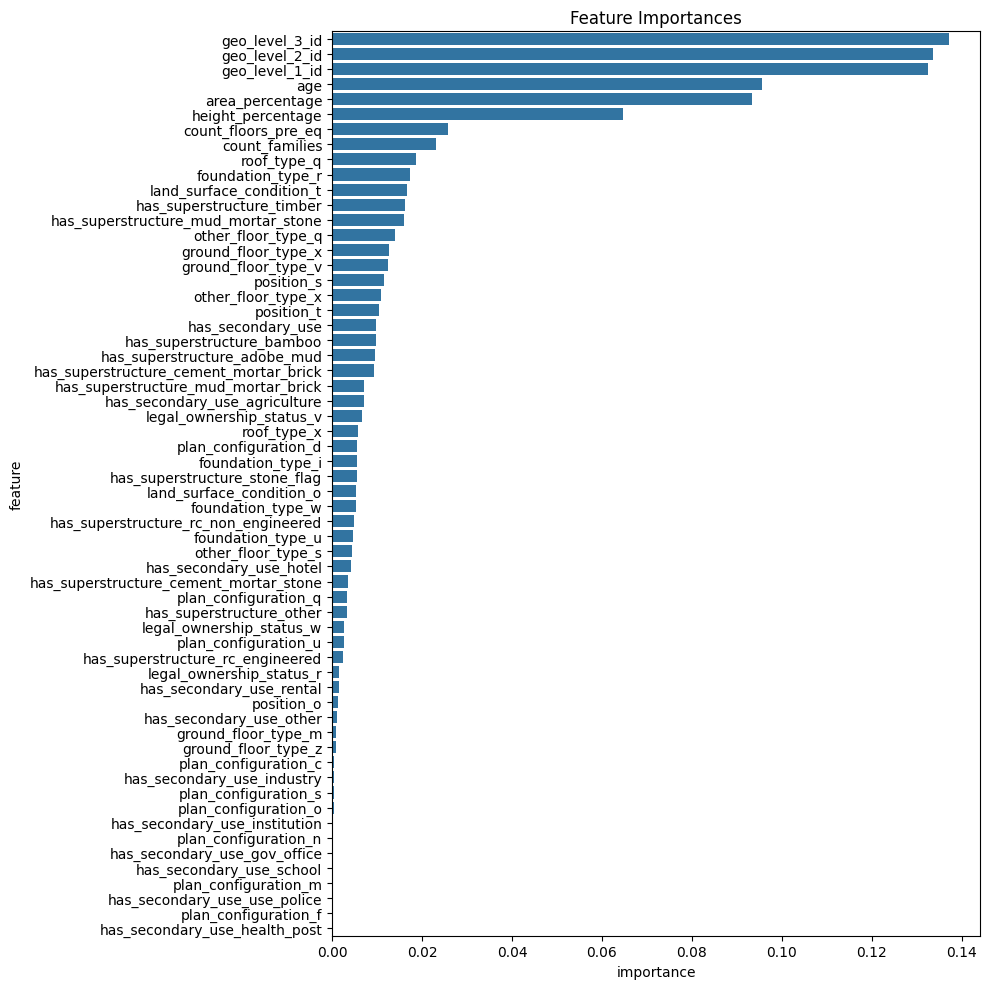

In [ ]:
feature_importances_rf = final_rf_model.feature_importances_

# Get the names of the features
feature_names = pro_data.drop('damage_grade', axis=1).columns

# Create a dataframe with feature names and importances
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances_rf
})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#### [Q3-1] 최적의 Bootstrap 수는 몇으로 확인되는가?

#### [Q3-2] 최적의 Tree 수를 기준으로 이 데이터셋에 대해서는 CART Bagging과 Random Forest 중에서 더 높은 분류 정확도를 나타내는 모형은 무엇인가?

#### [Q3-3] 각 Tree의 수(Bootstrap의 수)마다 CART Bagging 모형과의 분류 정확도를 비교할 수 있는 그래프를 도시하시오. Tree의 수는 CART Bagging과 Random Forest는 성능 차이에 영향을 미친다고 볼 수 있는가?


Bagging - n_estimators: 10, Accuracy: 0.6165, BCR: 0.5418118684824392
Random Forest - n_estimators: 10, Accuracy: 0.5955, BCR: 0.5155493612581068
Bagging - n_estimators: 30, Accuracy: 0.6365, BCR: 0.5539486425301314
Random Forest - n_estimators: 30, Accuracy: 0.621, BCR: 0.5116506820408145
Bagging - n_estimators: 50, Accuracy: 0.6455, BCR: 0.564348248807221
Random Forest - n_estimators: 50, Accuracy: 0.6375, BCR: 0.5297198511421268
Bagging - n_estimators: 100, Accuracy: 0.653, BCR: 0.5679269591950905
Random Forest - n_estimators: 100, Accuracy: 0.6445, BCR: 0.5350558878540878
Bagging - n_estimators: 200, Accuracy: 0.6525, BCR: 0.5625132646389902
Random Forest - n_estimators: 200, Accuracy: 0.6435, BCR: 0.5299588999172011
Bagging - n_estimators: 300, Accuracy: 0.6475, BCR: 0.554258021653535
Random Forest - n_estimators: 300, Accuracy: 0.6505, BCR: 0.5400050305187024
Bagging - n_estimators: 400, Accuracy: 0.653, BCR: 0.5644457249186658
Random Forest - n_estimators: 400, Accuracy: 0.648, 

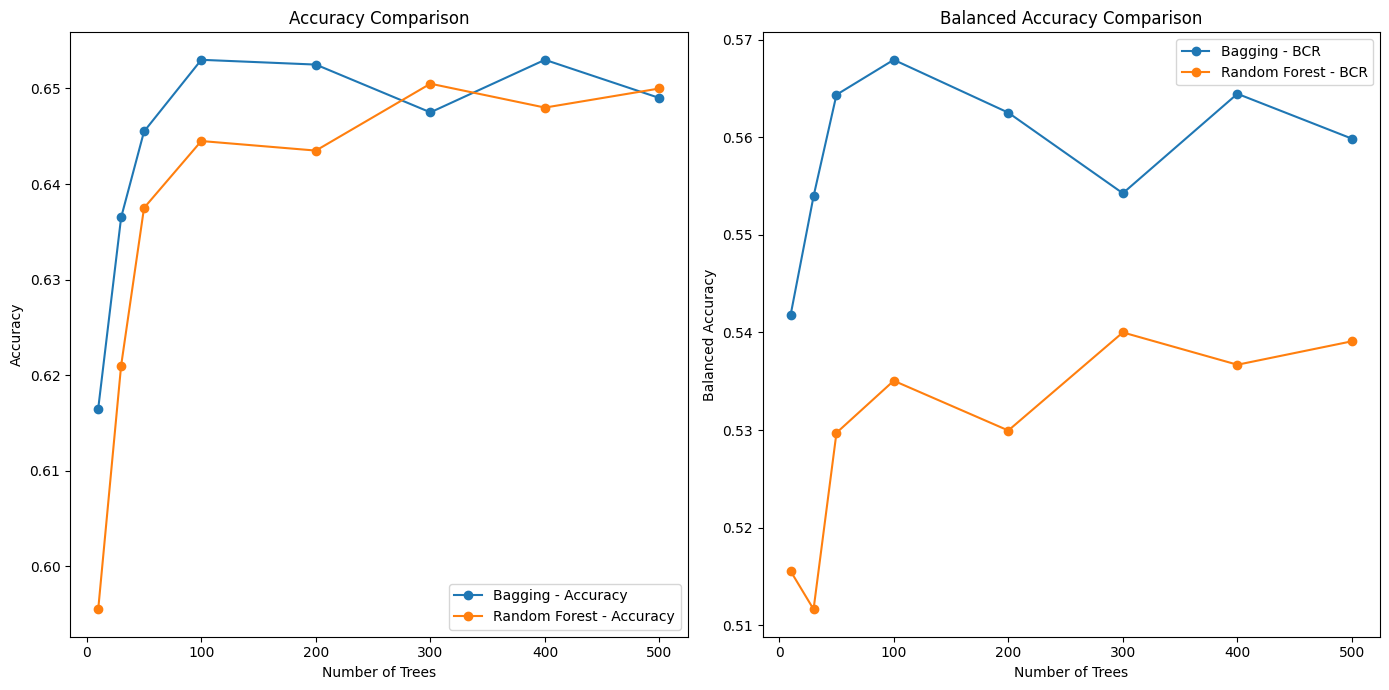

Performance Analysis
Tree Count: 10
Bagging Accuracy: 0.6165, Random Forest Accuracy: 0.5955
Bagging BCR: 0.5418, Random Forest BCR: 0.5155

Tree Count: 30
Bagging Accuracy: 0.6365, Random Forest Accuracy: 0.6210
Bagging BCR: 0.5539, Random Forest BCR: 0.5117

Tree Count: 50
Bagging Accuracy: 0.6455, Random Forest Accuracy: 0.6375
Bagging BCR: 0.5643, Random Forest BCR: 0.5297

Tree Count: 100
Bagging Accuracy: 0.6530, Random Forest Accuracy: 0.6445
Bagging BCR: 0.5679, Random Forest BCR: 0.5351

Tree Count: 200
Bagging Accuracy: 0.6525, Random Forest Accuracy: 0.6435
Bagging BCR: 0.5625, Random Forest BCR: 0.5300

Tree Count: 300
Bagging Accuracy: 0.6475, Random Forest Accuracy: 0.6505
Bagging BCR: 0.5543, Random Forest BCR: 0.5400

Tree Count: 400
Bagging Accuracy: 0.6530, Random Forest Accuracy: 0.6480
Bagging BCR: 0.5644, Random Forest BCR: 0.5367

Tree Count: 500
Bagging Accuracy: 0.6490, Random Forest Accuracy: 0.6500
Bagging BCR: 0.5599, Random Forest BCR: 0.5391



In [ ]:
# 트리 수 리스트
tree_numbers = [10, 30, 50, 100, 200, 300, 400, 500]

# 결과 저장을 위한 리스트 초기화
bagging_accuracy_list = []
rf_accuracy_list = []
bagging_bcr_list = []
rf_bcr_list = []

for n_estimators in tree_numbers:
    # CART Bagging 모델 생성 및 학습
    bagging_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_estimators,
        random_state=42
    )
    bagging_model.fit(X_train, y_train_int)
    y_val_pred_bagging = bagging_model.predict(X_val)
    bagging_accuracy = accuracy_score(y_val_int, y_val_pred_bagging)
    bagging_bcr = balanced_accuracy_score(y_val_int, y_val_pred_bagging)

    # Random Forest 모델 생성 및 학습
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train_int)
    y_val_pred_rf = rf_model.predict(X_val)
    rf_accuracy = accuracy_score(y_val_int, y_val_pred_rf)
    rf_bcr = balanced_accuracy_score(y_val_int, y_val_pred_rf)

    bagging_accuracy_list.append(bagging_accuracy)
    rf_accuracy_list.append(rf_accuracy)
    bagging_bcr_list.append(bagging_bcr)
    rf_bcr_list.append(rf_bcr)

    print(f'Bagging - n_estimators: {n_estimators}, Accuracy: {bagging_accuracy}, BCR: {bagging_bcr}')
    print(f'Random Forest - n_estimators: {n_estimators}, Accuracy: {rf_accuracy}, BCR: {rf_bcr}')

# 그래프 그리기
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(tree_numbers, bagging_accuracy_list, label='Bagging - Accuracy', marker='o')
plt.plot(tree_numbers, rf_accuracy_list, label='Random Forest - Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tree_numbers, bagging_bcr_list, label='Bagging - BCR', marker='o')
plt.plot(tree_numbers, rf_bcr_list, label='Random Forest - BCR', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()

# 성능 차이에 대한 분석
print("Performance Analysis")
for i, n_estimators in enumerate(tree_numbers):
    print(f'Tree Count: {n_estimators}')
    print(f'Bagging Accuracy: {bagging_accuracy_list[i]:.4f}, Random Forest Accuracy: {rf_accuracy_list[i]:.4f}')
    print(f'Bagging BCR: {bagging_bcr_list[i]:.4f}, Random Forest BCR: {rf_bcr_list[i]:.4f}')
    print()

### [Q4] [Q1]에서 찾은 최적의 hyperparameter를 이용하여 ANN 단일모형을 10번 반복하여 테스트 정확도를 평가해보시오. Accuracy와 BCR의 평균 및 표준편차를 기록하시오.

In [ ]:
# ANN 모델의 하이퍼파라미터 설정
accuracy_scores = []
bcr_scores = []

for i in range(10):
    # MLPClassifier 생성
    model, accuracy, bcr = train_NN_model(
        input_size=X_train.shape[1],
        train_loader=train_loader,
        val_loader=val_loader,
        hidden_size=best_params_ann['hidden_size'],
        layer_num=best_params_ann['layer_num'],
        activation_func=best_params_ann['activation_func'],
        lr=best_params_ann['learning_rate']
    )
    y_true_ann = []
    y_pred_ann = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_pred_ann.extend(predicted.tolist())
            y_true_ann.extend(targets.tolist())
    # 테스트 데이터에 대해 예측

    # 정확도와 BCR 계산
    accuracy = accuracy_score(y_true_ann, y_pred_ann)
    bcr = balanced_accuracy_score(y_true_ann, y_pred_ann)

    accuracy_scores.append(accuracy)
    bcr_scores.append(bcr)

    print(f'Run {i+1}: Accuracy: {accuracy:.4f}, BCR: {bcr:.4f}')

# 평균 및 표준편차 계산
accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores)
bcr_mean = np.mean(bcr_scores)
bcr_std = np.std(bcr_scores)

print(f'ANN Model - Accuracy: Mean={accuracy_mean:.4f}, Std={accuracy_std:.4f}')
print(f'ANN Model - BCR: Mean={bcr_mean:.4f}, Std={bcr_std:.4f}')

Early stopping triggered
Run 1: Accuracy: 0.5695, BCR: 0.3338308457711443
Early stopping triggered
Run 2: Accuracy: 0.618, BCR: 0.5028059031147718
Early stopping triggered
Run 3: Accuracy: 0.569, BCR: 0.3333333333333333
Early stopping triggered
Run 4: Accuracy: 0.6055, BCR: 0.45942511191843943
Early stopping triggered
Run 5: Accuracy: 0.5805, BCR: 0.35793653656148083
Early stopping triggered
Run 6: Accuracy: 0.569, BCR: 0.3333333333333333
Early stopping triggered
Run 7: Accuracy: 0.61, BCR: 0.42991271673268106
Early stopping triggered
Run 8: Accuracy: 0.5995, BCR: 0.4190050589174806
Early stopping triggered
Run 9: Accuracy: 0.6215, BCR: 0.5042027796722305
Early stopping triggered
Run 10: Accuracy: 0.63, BCR: 0.5028793495906524
ANN Model - Accuracy: Mean=0.5973, Std=0.0223
ANN Model - BCR: Mean=0.4177, Std=0.0698


### [Q5] ANN Bagging 모델에 대해 다음 물음에 답하시오.

In [ ]:
def bootstrap_loader(dataset, batch_size):
    n_samples = len(dataset)
    indices = np.random.choice(n_samples, n_samples, replace=True)
    subset = Subset(dataset, indices)
    return DataLoader(subset, batch_size=batch_size, shuffle=True)

def predict_ensemble(models, loader):
    predictions = []
    for model in models:
        model.eval()
        y_pred = []
        with torch.no_grad():
            for inputs, _ in loader:
                inputs = inputs.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                y_pred.extend(predicted.cpu().numpy())
        predictions.append(y_pred)
    return predictions

def bagging_predict(models, loader):
    predictions = predict_ensemble(models, loader)
    predictions = list(zip(*predictions))
    final_predictions = [max(set(p), key=p.count) for p in predictions]
    return final_predictions

def make_ann_bagging(num_models,batch_size=128):
    # Train multiple models with bootstrap samples
    models = []
    for _ in range(num_models):
        boottrain_loader = bootstrap_loader(train_dataset, batch_size)
        model,_,__ = train_NN_model(
            input_size=X_train.shape[1],
            train_loader=boottrain_loader,
            val_loader=val_loader,
            hidden_size=best_params_ann['hidden_size'],
            layer_num=best_params_ann['layer_num'],
            activation_func=best_params_ann['activation_func'],
            lr=best_params_ann['learning_rate'])
        models.append(model)

    # Predict on the test set using bagging
    y_pred = bagging_predict(models, test_loader)

    # Evaluate the bagging model
    accuracy = accuracy_score(y_test_int, y_pred)
    bcr = balanced_accuracy_score(y_test_int, y_pred)

    print(f'Bagging ANN - num of bootstrap: {num_models}, Accuracy: {accuracy:.4f}, BCR: {bcr:.4f}')
    return accuracy, bcr

#### [Q5-1] Bootstrap의 수를 (10, 30, 50, 100, 200, 300)의 순으로 증가시키면서 Accuracy와 BCR을 구해보시오

In [ ]:
bootstrap_samples = [10, 30, 50, 100, 200, 300]
accuracy_list = []
bcr_list = []
for num in bootstrap_samples :
    accuracy, bcr = make_ann_bagging(num)
    accuracy_list.append(accuracy)
    bcr_list.append(bcr)

Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Bagging ANN - num of bootstrap: 10, Accuracy: 0.6060, BCR: 0.4137
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early stopping triggered
Early sto

In [ ]:
df_bagging_ann = pd.DataFrame({
    'Bootstrap 수': bootstrap_samples,
    'Accuracy': accuracy_list,
    'BCR': bcr_list
})
display(df_bagging_ann)

,Bootstrap 수,Accuracy,BCR
0,10,0.6060,0.413679
1,30,0.6075,0.437305
2,50,0.6050,0.420524
3,100,0.5960,0.394543
4,200,0.6020,0.405446
5,300,0.6010,0.404860


#### [Q5-2] 최적의 Bootstrap 수는 몇으로 확인되는가?

#### [Q5-3] 이 모델은 최적의 단일 모형과 비교했을 때 어떠한 성능 차이가 있는가?


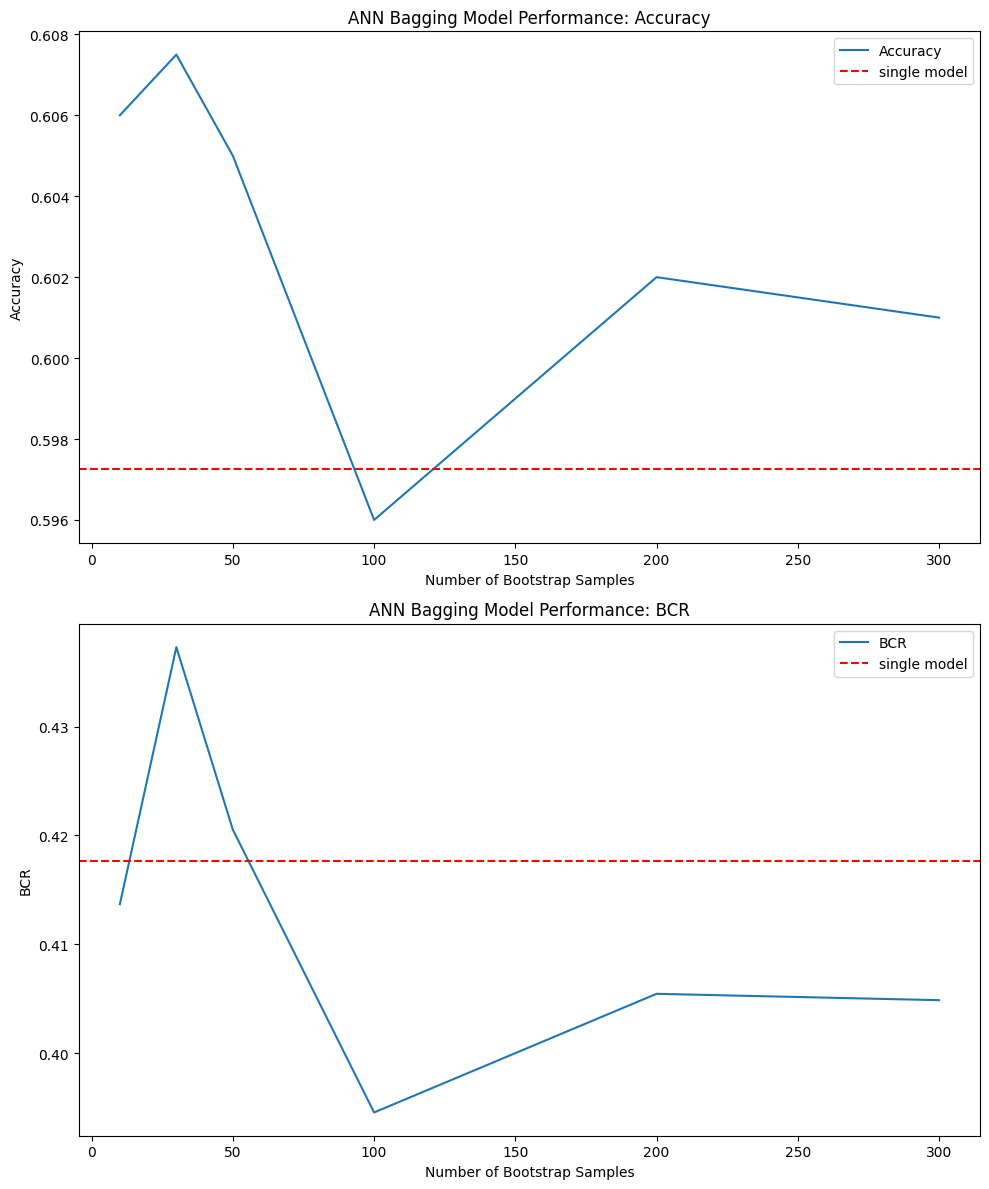

In [ ]:
# Create a figure and set its size
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the data using Seaborn on the first subplot (Accuracy)
sns.lineplot(ax=axs[0], data=df_bagging_ann, x='Bootstrap 수', y='Accuracy', label='Accuracy')
axs[0].axhline(y=accuracy_mean, color='r', linestyle='--', label='single model')
axs[0].set_title('ANN Bagging Model Performance: Accuracy')
axs[0].set_xlabel('Number of Bootstrap Samples')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot the data using Seaborn on the second subplot (BCR)
sns.lineplot(ax=axs[1], data=df_bagging_ann, x='Bootstrap 수', y='BCR', label='BCR')
axs[1].axhline(y=bcr_mean, color='r', linestyle='--', label='single model')
axs[1].set_title('ANN Bagging Model Performance: BCR')
axs[1].set_xlabel('Number of Bootstrap Samples')
axs[1].set_ylabel('BCR')
axs[1].legend()

# Adjust layout to make room for titles
plt.tight_layout()

# Show the plot
plt.show()

### [Q6] Adaptive Boosting(AdaBoost)에 대해 다음 물음에 답하시오.

In [ ]:
# Hyperparameter 후보 값 설정
param_grid = {
    'n_estimators': [10, 30, 50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# ParameterGrid 생성
param_grid_list = list(ParameterGrid(param_grid))

best_score = 0
best_params_ada = None
best_model = None

# 검증 세트를 사용하여 하이퍼파라미터 탐색
for params in param_grid_list:
    model = AdaBoostClassifier(**params, random_state=42)
    model.fit(X_train, y_train_int)
    y_val_pred = model.predict(X_val)
    score = balanced_accuracy_score(y_val_int, y_val_pred)
    if score > best_score:
        best_score = score
        best_params_ada = params
        best_model = model

# 최적의 Hyperparameter 출력
print(f"Best hyperparameters: {best_params_ada}")

#### [Q6-2] 최적의 hyperparameter 값을 이용하여 AdaBoost 모델을 학습한 뒤, Test dataset에 적용하여 먼저 구축된 모델들과 분류 성능을 비교해보시오.

# 최적의 hyperparameter로 모델 학습
best_ada = AdaBoostClassifier(**best_params_ada, random_state=42)
best_ada.fit(X_train, y_train_int)  # 전체 Train/Validation 데이터로 학습

# Test dataset 예측
y_pred = best_ada.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test_int, y_pred)
bcr = balanced_accuracy_score(y_test_int, y_pred)

print(f"AdaBoost - Accuracy: {accuracy:.4f}, BCR: {bcr:.4f}")

Best hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}
AdaBoost - Accuracy: 0.6515, BCR: 0.5807


#### [Q6-1] Hyperparameter 후보 값들을 명시하고, Validation dataset을 통해 최적의 hyperparameter 값을 찾아보시오.

#### [Q6-2] 최적의 hyperparameter 값을 이용하여 AdaBoost 모델을 학습한 뒤, Test dataset에 적용하여 먼저 구축된 모델들과 분류 성능을 비교해보시오.


### [Q7] Gradient Boosting Machine(GBM)에 대해 다음 물음에 답하시오.

In [ ]:
# Hyperparameter 후보 값 설정
param_grid = {
    'n_estimators': [10, 30, 50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [3, 4, 5]
}

best_score = 0
best_params_gbm = None
best_model = None

# ParameterGrid 생성
param_grid_list = list(ParameterGrid(param_grid))

# 검증 세트를 사용하여 하이퍼파라미터 탐색
for params in param_grid_list:
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train, y_train_int)
    y_val_pred = model.predict(X_val)
    score = accuracy_score(y_val_int, y_val_pred)
    if score > best_score:
        best_score = score
        best_params_gbm = params
        best_model = model

# 최적의 Hyperparameter 출력
print(f"Best hyperparameters: {best_params_gbm}")

#### [Q7-2] 최적의 hyperparameter 값을 이용하여 GBM 모델을 학습(변수의 중요도가 산출되도록 학습)한 뒤, Test dataset에 적용하여 먼저 구축된 모델들과 분류 성능을 비교해보시오.

# 최적의 hyperparameter로 모델 학습
best_gbm = GradientBoostingClassifier(**best_params_gbm, random_state=42)
best_gbm.fit(X_train, y_train_int)  # 전체 Train/Validation 데이터로 학습

# Test dataset 예측
y_pred = best_gbm.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test_int, y_pred)
bcr = balanced_accuracy_score(y_test_int, y_pred)

print(f"GBM - Accuracy: {accuracy:.4f}, BCR: {bcr:.4f}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
GBM - Accuracy: 0.6850, BCR: 0.6050


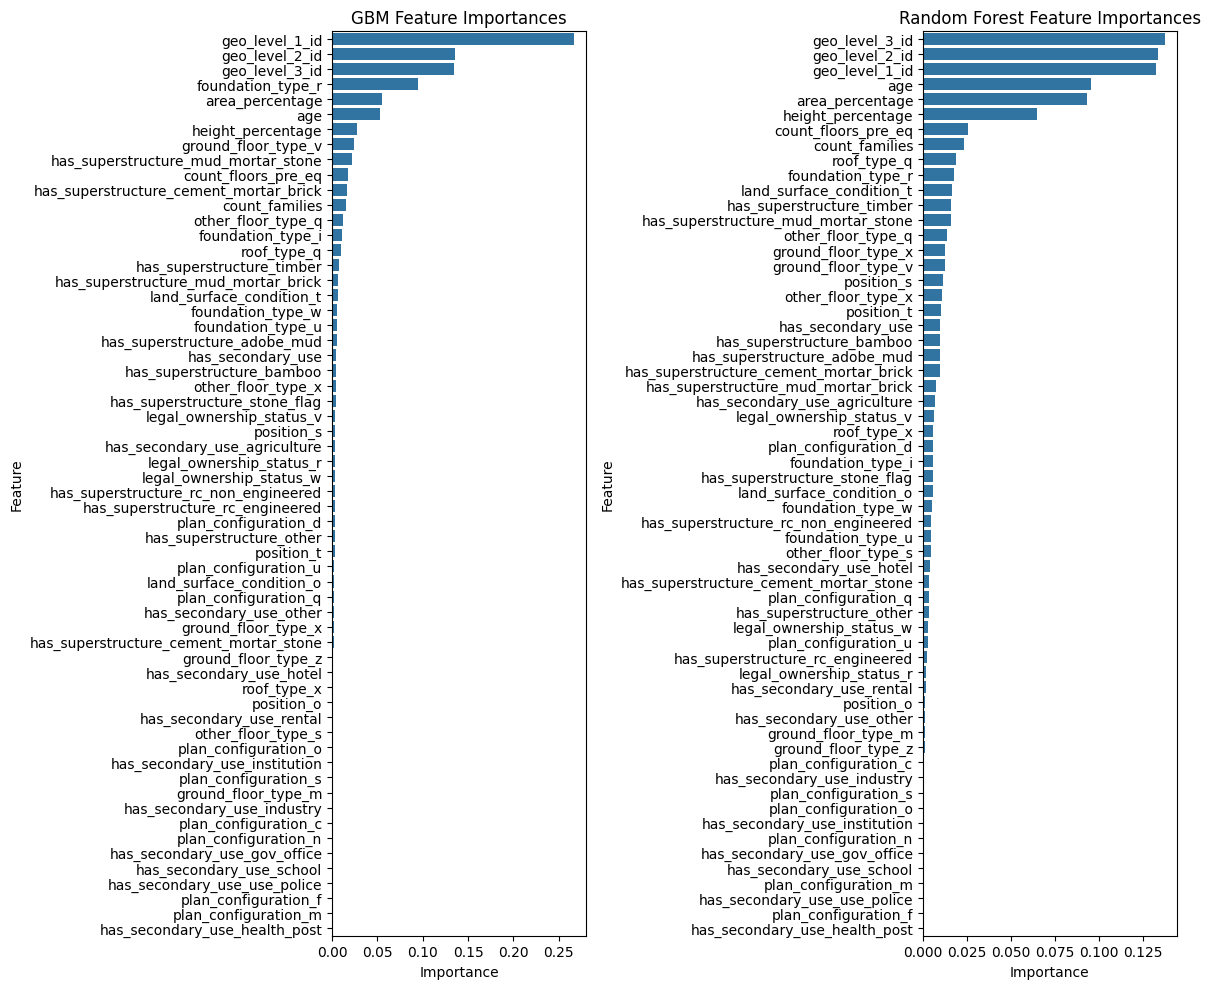

In [ ]:
#### [Q7-3] 산출된 변수의 중요도를 해석해보고, Random Forest 모델에서 산출된 주요 변수와 비교해보시오.

# 변수 중요도 산출
feature_importances_gbm = best_gbm.feature_importances_

# 변수 중요도 시각화
importance_gbm = pd.Series(feature_importances_gbm, index=feature_names).sort_values(ascending=False)
importance_rf = pd.Series(feature_importances_rf, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.barplot(x=importance_gbm, y=importance_gbm.index)
plt.title('GBM Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
sns.barplot(x=importance_rf, y=importance_rf.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

#### [Q7-1] Hyperparameter 후보 값들을 명시하고, Validation dataset을 통해 최적의 hyperparameter 값을 찾아보시오.

#### [Q7-2] 최적의 hyperparameter 값을 이용하여 GBM 모델을 학습(변수의 중요도가 산출되도록 학습)한 뒤, Test dataset에 적용하여 먼저 구축된 모델들과 분류 성능을 비교해보시오.

#### [Q7-3] 산출된 변수의 중요도를 해석해보고, Random Forest 모델에서 산출된 주요 변수와 비교해보시오.


### [Q8] 총 여덟 가지의 모델(Multinomial logistic regression, CART, ANN, CART Bagging, ANN Bagging, Random Forest, AdaBoost, GBM) 중 BCR 관점에서 가장 우수한 분류 정확도를 나타내는 모형은 무엇인가?

### [Extra Question]
이 데이터셋은 아래 표와 같이 Class 2 > Class 3 > Class 1 순으로 높은 비중을 차지하고 있으며, 범주의 불균형이 상당한 수준이다. [Q8]에서 선정된 가장 우수한 모델(알고리즘 및 hyperparameter)에 대해서 데이터 전처리 관점에서 불균형을 해소하여 분류 성능을 향상시킬 수 있는 아이디어를 제시하고 실험을 통해 검증해보시오.

구분	Class 1	Class 2	Class 3
N. of instances	25,124	148,259	87,218
%	9.64%	56.89%	33.49%


In [60]:
method = []
extra_accuracy = []
extra_bcr = []

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_int)

# 모델 훈련
cart_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train_smote, y_train_smote)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('SMOTE')

Accuracy: 0.6155
Balanced Accuracy: 0.5701


In [61]:
# 모델 훈련
cart_bagging = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train, y_train_int)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('BalancedBaggingClassifier')

Accuracy: 0.5895
Balanced Accuracy: 0.6439


In [62]:
# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_int)

# 모델 훈련
balanced_bagging = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                             n_estimators=best_n_estimators_cart,
                                             random_state=42)
balanced_bagging.fit(X_train_smote, y_train_smote)

# 예측
y_pred = balanced_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('BalancedBaggingClassifier+SMOTE')

Accuracy: 0.6195
Balanced Accuracy: 0.5737


In [63]:
# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train_int)

# 모델 훈련
cart_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train_rus, y_train_rus)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('RandomUnderSampler')

Accuracy: 0.5465
Balanced Accuracy: 0.6392


In [64]:
# 조합 샘플링 적용
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train_int)

# 모델 훈련
cart_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train_smoteenn, y_train_smoteenn)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('SMOTEENN')

Accuracy: 0.5215
Balanced Accuracy: 0.6258


In [65]:
# 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train_int)

# 모델 훈련
cart_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train_ros, y_train_ros)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('RandomOverSampler')

Accuracy: 0.6280
Balanced Accuracy: 0.5816


In [66]:
# 오버샘플링 적용
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train_int)

# 모델 훈련
cart_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train_adasyn, y_train_adasyn)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('ADASYN')

Accuracy: 0.6255
Balanced Accuracy: 0.5805


In [67]:
# 언더샘플링 적용
nearmiss = NearMiss()
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train_int)

# 모델 훈련
cart_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train_nearmiss, y_train_nearmiss)

# 예측
y_pred = cart_bagging.predict(X_val)

# 평가
accuracy = accuracy_score(y_val_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_val_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

extra_accuracy.append(accuracy)
extra_bcr.append(balanced_accuracy)
method.append('NearMiss')

Accuracy: 0.3925
Balanced Accuracy: 0.5430


In [68]:
display(pd.DataFrame({
    'Method': method,
    'Accuracy': extra_accuracy,
    'BCR': extra_bcr
}))

,Method,Accuracy,BCR
0,SMOTE,0.6155,0.570138
1,BalancedBaggingClassifier,0.5895,0.643862
2,BalancedBaggingClassifier+SMOTE,0.6195,0.573710
3,RandomUnderSampler,0.5465,0.639152
4,SMOTEENN,0.5215,0.625755
5,RandomOverSampler,0.6280,0.581568
6,ADASYN,0.6255,0.580511
7,NearMiss,0.3925,0.542974


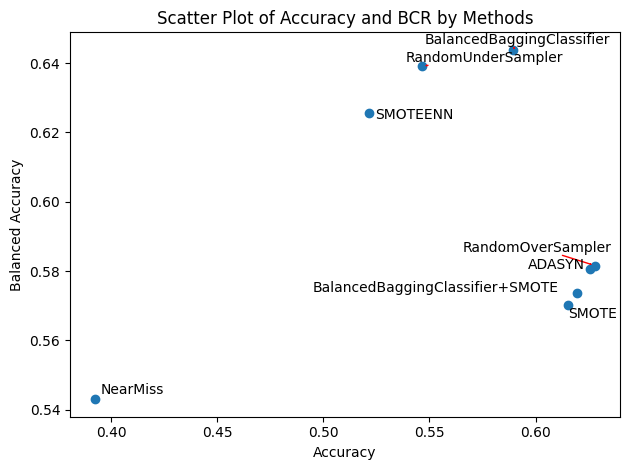

In [73]:
# Create the data
x = extra_accuracy
y = extra_bcr
labels = method

# Create the plot
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(x, y)

# 레이블 추가
texts = [ax.annotate(label, (x[i], y[i]), fontsize=10) for i, label in enumerate(labels)]

# 레이블 조정
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Set the axes labels
ax.set_xlabel('Accuracy')
ax.set_ylabel('Balanced Accuracy')

# Set the title
ax.set_title('Scatter Plot of Accuracy and BCR by Methods')

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
# 모델 훈련
cart_bagging = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=best_n_estimators_cart, random_state=42)
cart_bagging.fit(X_train, y_train_int)

# 예측
y_pred = cart_bagging.predict(X_test)

# 평가
accuracy = accuracy_score(y_test_int, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test_int, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Accuracy: 0.6345
Balanced Accuracy: 0.6819
